In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector, array_to_latex, plot_histogram

# 1. Coding Part

By: 
 - Simon Vedaa
 - Christoffer Slettebø
 - Khalil Ibrahim

## Task 1.1 Playing with quantum circuits

In [2]:
# 1 to get the result i need to verify our code with.

qc_RRLL = QuantumCircuit(4)
#3 to R
qc_RRLL.h(3)
qc_RRLL.s(3)
#2 to R
qc_RRLL.h(2)
qc_RRLL.s(2)
#1 to L
qc_RRLL.h(1)
qc_RRLL.s(1)
qc_RRLL.z(1)
#0 to L
qc_RRLL.h(0)
qc_RRLL.s(0)
qc_RRLL.z(0)

qc_LLRR = QuantumCircuit(4)

#0 to R
qc_LLRR.h(0)
qc_LLRR.s(0)
#1 to R
qc_LLRR.h(1)
qc_LLRR.s(1)
#2 to L
qc_LLRR.h(2)
qc_LLRR.s(2)
qc_LLRR.z(2)
#3 to L
qc_LLRR.h(3)
qc_LLRR.s(3)
qc_LLRR.z(3)

sv_2 = (1/np.sqrt(2))*(Statevector(qc_RRLL) - Statevector(qc_LLRR))
sv_2.draw(output = 'latex')

# 3.

<IPython.core.display.Latex object>

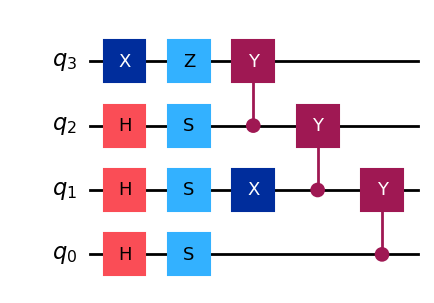

In [3]:
def MakeQC_RRLL_LLRR():
    qc = QuantumCircuit(4)
    
    # 3 to |1>
    qc.x(3)
    qc.z(3)
  
    # 2 to |R>
    qc.h(2)
    qc.s(2)

    # 1 to |L>
    qc.h(1)
    qc.s(1)
    qc.x(1)
    
    # 0 to |R>
    qc.h(0)
    qc.s(0)
    
    #entangle 

    qc.cy(2,3)
    qc.cy(1,2)
    qc.cy(0,1)
    return qc
qc = MakeQC_RRLL_LLRR()
sv = Statevector(qc)
sv.draw(output = 'latex')
qc.draw(output="mpl", reverse_bits=True)

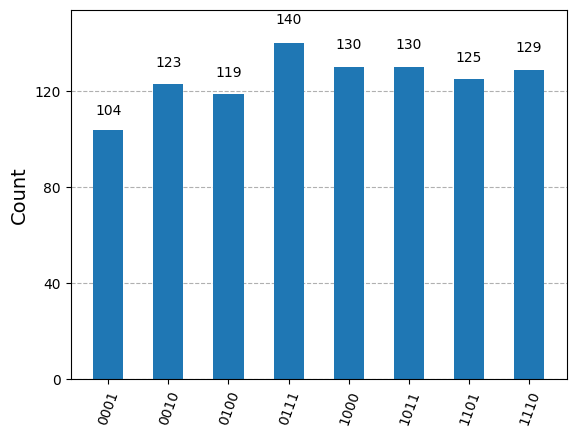

In [4]:
#1.1.1
backend = AerSimulator()
def measure(qc: QuantumCircuit, shots=1000):
    qc.measure_all()
    transpiled_qc = transpile(qc, backend)
    job = backend.run(transpiled_qc, shots=shots)
    result = job.result()
    return result.get_counts()

qc = MakeQC_RRLL_LLRR()

plot_histogram(measure(qc, shots=1000))

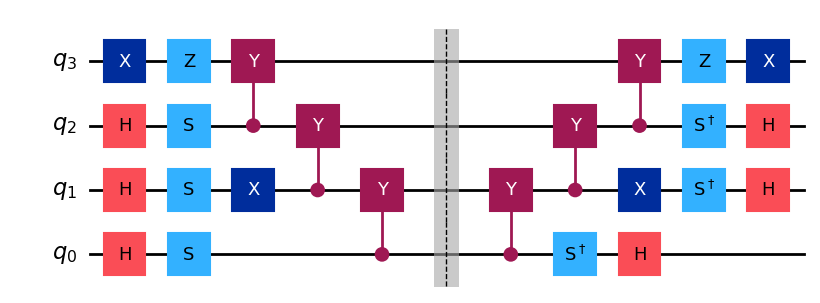

In [5]:
#inverse 

qc = MakeQC_RRLL_LLRR()

qc.barrier()
#untangle 
qc.cy(0,1)
qc.cy(1,2)
qc.cy(2,3)


# reverse 3
qc.z(3)
qc.x(3)

# reverse 2
qc.sdg(2)
qc.h(2)

# reverse 1
qc.x(1)
qc.sdg(1)
qc.h(1)

# reverse 0
qc.sdg(0)
qc.h(0)

sv = Statevector(qc)
sv.draw(output = 'latex')
qc.draw(output="mpl", reverse_bits=True)

Comment on how you figured out how to construct it:

We know that the gates are self-adjoint, so we figured than we can take the daggered version of the gates to reverse it. 

## Task 1.2 Quantum State Tomography

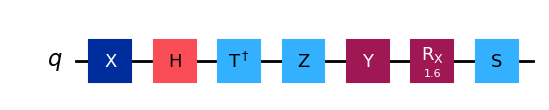

In [6]:
# 1.
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.tdg(0) # tdg - (T-dagger) porten
qc.z(0)
qc.y(0)
qc.rx(1.6,0)
qc.s(0)

qc.draw('mpl', reverse_bits=True)

In [7]:
# 2.
## Statevector er en representasjon av en kvantetilstand i form av en vektor i et komplekst Hilbert-rom.
statevector = Statevector(qc)
statevector.draw('latex')

<IPython.core.display.Latex object>

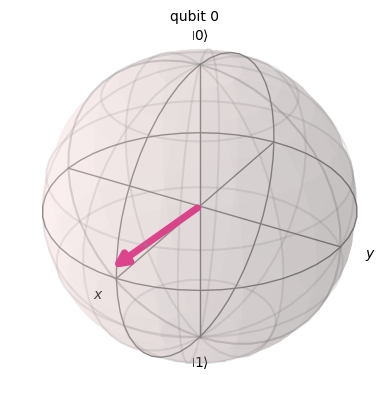

In [8]:
# Plot qc vectors on Bloch Sphere
plot_bloch_multivector(statevector)

In [9]:
# 3. Measurment

backend = AerSimulator()

## Measure in Z-basis
qc_z = qc.copy()
qc_z.measure_all()
results = backend.run(qc_z, shots=1000).result()
counts_z = results.get_counts()
print('Measurment in Z-basis: {}'.format(counts_z))

# Z-basis circuit
qc_z.draw()

Measurment in Z-basis: {'0': 140, '1': 860}


┌───┐┌───┐┌─────┐┌───┐┌───┐┌─────────┐┌───┐ ░ ┌─┐
     q: ┤ X ├┤ H ├┤ Tdg ├┤ Z ├┤ Y ├┤ Rx(1.6) ├┤ S ├─░─┤M├
        └───┘└───┘└─────┘└───┘└───┘└─────────┘└───┘ ░ └╥┘
meas: 1/═══════════════════════════════════════════════╩═
                                                       0

In [10]:
## Measure in X-basis
qc_x = qc.copy()
qc_x.h(0)  # Hadamard-port for å endre til X-basis
qc_x.measure_all() 

results = backend.run(qc_x, shots=1000).result()
counts_x = results.get_counts()
print('Measurment in X-basis: {}'.format(counts_x))

# X-basis circuit
qc_x.draw()

Measurment in X-basis: {'0': 482, '1': 518}


┌───┐┌───┐┌─────┐┌───┐┌───┐┌─────────┐┌───┐┌───┐ ░ ┌─┐
     q: ┤ X ├┤ H ├┤ Tdg ├┤ Z ├┤ Y ├┤ Rx(1.6) ├┤ S ├┤ H ├─░─┤M├
        └───┘└───┘└─────┘└───┘└───┘└─────────┘└───┘└───┘ ░ └╥┘
meas: 1/════════════════════════════════════════════════════╩═
                                                            0

In [11]:
## Measure in Y-basis

qc_y = qc.copy()
qc_y.h(0)
qc_y.sdg(0)
qc_y.measure_all()

results = backend.run(qc_y, shots=1000).result()
counts_y = results.get_counts()
print('Measurment in Y-basis: {}'.format(counts_y))

# Y-basis circuit
qc_y.draw()

Measurment in Y-basis: {'1': 516, '0': 484}


┌───┐┌───┐┌─────┐┌───┐┌───┐┌─────────┐┌───┐┌───┐┌─────┐ ░ ┌─┐
     q: ┤ X ├┤ H ├┤ Tdg ├┤ Z ├┤ Y ├┤ Rx(1.6) ├┤ S ├┤ H ├┤ Sdg ├─░─┤M├
        └───┘└───┘└─────┘└───┘└───┘└─────────┘└───┘└───┘└─────┘ ░ └╥┘
meas: 1/═══════════════════════════════════════════════════════════╩═
                                                                   0

# 4

- Målet er å beregne sannsynlighetsamplitudene $r$, $s$, og vinkel $α$, som beskriver den ukjente kvantetilstanden til $∣ψ⟩$. Disse parameterne kan betraktes ved hjelp av 3 basis som vil utgjøre koordinatene til tilstanden på Bloch-Sphere. 
- Vi kan bruke z-basis måle resultatene fra oppgave 1.3 til å estimere r og s. Videre kan vi bruke X- og Y-basis measurment counts resultatene til å finne $\alpha$. 
    - $r$: Amplituden for tilstanden $\ket{0}$.
    - $s$: Amplituden for tilstanden $\ket{1}$.
    - $α$: Vinkelen som beskriver faseforskjellen mellom tilstandene $\ket{0}$ og $\ket{1}$.
- Formelen er: $\ket{\psi}=r\ket{0} + se^{i\alpha} \ket{1}$ 

In [12]:
def reconstruct_state(z_counts, x_counts, y_counts, shots_number):
    # Basis-tilstandene
    ket_0 = np.array([1, 0])
    ket_1 = np.array([0, 1])

    # Beregn r og s fra Z-basis measures (counts for |0> og |1>)
    r = np.sqrt(z_counts.get('0') / shots_number)
    s = np.sqrt(z_counts.get('1') / shots_number)
    
    # Beregn cos(α) fra X-basis measures
    p_plus_x = x_counts.get('0') / shots_number  # |+> måles som 0 i Qiskit
    p_minus_x = x_counts.get('1') / shots_number # |-> måles som 0 i Qiskit
    cos_alpha = 2*(p_plus_x - p_minus_x) / (4 * r * s) # Bruker formelen for cos(α)


    # Beregn sin(α) fra Y-basis measures
    p_r_y = y_counts.get('0') / shots_number  # |R> / i måles som 0 i Qiskit
    p_l_y = y_counts.get('1') / shots_number  # |L> / -i måles som 0 i Qiskit
    sin_alpha = 2*(p_r_y - p_l_y) / (4 * r * s) # Bruker formelen for sin(α)

    # Beregner α
    alpha = np.arctan2(sin_alpha, cos_alpha)
    
    # Rekonstruer tilstanden ved å fylle formelen
    reconstructed_state = (r * ket_0) + (s * (np.exp(1j * alpha) * ket_1))
    
    return reconstructed_state, (r,s,alpha)


reconstructed_state, parameters = reconstruct_state(counts_z, counts_x, counts_y, shots_number=1000)
r,s,alpha = parameters

print(f"Reconstructed state: {reconstructed_state}")
print(f'r, s, alpha = {r}, {s}, {alpha}')


Reconstructed state: [ 0.37416574+0.j         -0.69311889-0.61610568j]
r, s, alpha = 0.37416573867739417, 0.9273618495495703, -2.4149503129080676


# 2.2: Only included to verify manual results

In [13]:
# Calculate measurement operator for 2.2.3
I = np.identity(2)
H = (1/np.sqrt(2))*np.matrix([[1,1],[1,-1]])
Y = np.matrix([[0, -1j],[1j,0]])

first_part = np.kron(np.kron(H, Y), I)
array_to_latex(first_part)

<IPython.core.display.Latex object>

In [14]:
X = np.matrix([[0,1],[1,0]])
CX = np.vstack([
    np.hstack([I, np.zeros((2,2))]),
    np.hstack([np.zeros((2,2)), X])
])
SWAP = np.matrix([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])



second_part = np.kron(I, SWAP@CX@SWAP)
array_to_latex(second_part)

<IPython.core.display.Latex object>

In [15]:
U_dag = first_part @ second_part
array_to_latex(U_dag)

<IPython.core.display.Latex object>